# Lession 12 - L2 Regularization

In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras import regularizers
from matplotlib.pyplot import plot
%matplotlib inline

In [11]:
notMNIST = np.load('../data/notMNIST_train_100.npz')
notMNIST.keys()
images = notMNIST['train_images']
labels = notMNIST['train_labels']

label_names = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
pd.Series(label_names[notMNIST['train_labels']]).value_counts()

D    20
G    14
J    14
I    12
E     9
A     8
C     7
H     7
B     5
F     4
dtype: int64

In [14]:
images.shape

(100, 28, 28)

In [15]:
X = images.reshape(100, 28*28)
X.shape

(100, 784)

In [17]:
X.max()

0.5

In [18]:
X.min()

-0.5

No need to rescale

In [19]:
P = pd.get_dummies(labels).values
P

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0,

In [27]:
# Keras
model = Sequential()
model.add(Dense(10, input_shape=(28*28,), kernel_regularizer=regularizers.l2(100)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(X, P, validation_split=0.2, epochs=100, verbose=0)

In [7]:
28*28

784

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


7850 parameters and only 100 image.  Overtraining

In [29]:
accuracy = pd.DataFrame()
accuracy['epoch']     = hist.epoch
accuracy['epoch']     = accuracy['epoch'] + 1
accuracy['training']  = hist.history['acc']
accuracy['testing']   = hist.history['val_acc']
accuracy['baseline']  = 0.1
accuracy.head()

,epoch,training,testing,baseline
0,1,0.075,0.00,0.1
1,2,0.075,0.05,0.1
2,3,0.075,0.05,0.1
3,4,0.050,0.05,0.1
4,5,0.050,0.05,0.1


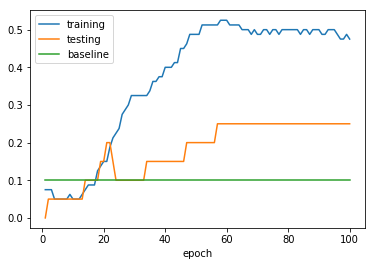

In [30]:
ax = accuracy.plot.line(x='epoch', y='training')
ax = accuracy.plot.line(x='epoch', y='testing', ax=ax)
accuracy.plot.line(x='epoch', y='baseline', ax=ax)